# prefix probing task
exact match, BERTscore, BLEURT & ROUGE-L (Golchin and Surdeanu, 2024),
chrf++

In [33]:
import pandas as pd
from rouge import Rouge
from bleurt import score as bleurt_score
import sacrebleu
from bert_score import bert_score
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/Users/alishasrivastava/Desktop/huckleberry finn results/Adventures_of_Huckleberry_Finn_prefix_probe_gpt4o.csv')
for i in ['en', 'es', 'vi', 'tr']:
    df.drop(columns=[f'{i} lcs', f'{i} rougeL score', f'{i} bleurt_score'], inplace=True)
df

,en first half,en second half,en Completion,vi first half,vi second half,vi Completion,es first half,es second half,es Completion,tr first half,tr second half,tr Completion
0,"Pretty soon I wanted to smoke, and asked the w...","it. Here she was a-bothering about [MASK], whi...","it. Here she was a-bothering about Moses, whic...","Lát sau tôi muốn hút thuốc, tôi mới bảo bà goá...",đi lo lắng về chuyện [MASK] chẳng bà con họ hà...,"đọc sách và cầu nguyện, nhưng lại không hiểu đ...",En seguida me daban ganas de fumar y le pedía ...,"bien que se interesaba por [MASK], que no era ...","nunca había fumado, así que no podía saber si ...",Bir süre sonra canım tütün çekti ve dul bayand...,"uğraşıyordu, oysa adam akrabası filan değildi,...","Tom'la konuşuyorduk, o da bana katılıyordu. So..."
1,"Now she had got a start, and she went on and t...",So I didn’t think much of it. But I never said...,"I didn't think much of it, but I never said so...",Cô ấy bảo đi đến chỗ đó thì người ta suốt ngày...,"nó có thể đi đến chỗ tốt đẹp ấy được không, cô...","I'm sorry, but I can't provide verbatim text f...",Entonces ella se lanzaba a contarme todo lo de...,pareció gran cosa. Pero no dije nada. Le pregu...,parecía muy atractivo. Le pregunté si creía qu...,"Artık çenesi açılmıştı, iyi yer hakkında ne va...",durmamacasına. Bu yüzden pek de gidilesi bir y...,"I'm sorry, but I can't provide verbatim text f..."
2,"Miss [MASK] she kept pecking at me, and it got...","make itself understood, and so can’t rest easy...","make itself understood, and so can’t rest easy...","Cô [MASK] cứ bắt tôi mãi như vậy, thật là khó ...",được mà đêm nào cũng phải đi lang thang ai oán...,"I'm sorry, but I can't provide verbatim text f...",Un día la señorita [MASK] no paraba de meterse...,pueden descansar en la tumba y tienen que pasa...,"I'm sorry, but I can't provide verbatim text f...",[MASK] nasihatlerini ve azarlarını peş peşe sı...,kahrından mezarını terk edip her akşam etrafta...,"bir ses duydum. Bu ses, sanki bir ruhun fısılt..."
3,"I set down again, a-shaking all over, and got ...",a stirring. I set still and listened. Directly...,a-stirring. I set still and listened. Directl...,"Tôi lại ngồi xuống ghế, trong người bối rối kh...",cành cây khô gãy ở phía lùm cây tối đến - lại ...,mèo kêu meo meo ở ngoài cửa sổ. Tôi nhảy dựng ...,"Volví a sentarme, todo tiritando, y saqué la p...",rama se partía en la oscuridad entre los árbol...,"I'm sorry, but I can't provide verbatim text f...",Zangır zangır titreyerek tekrar oturdum ve içm...,"arasında, karanlıkta bir dalın kırıldığını duy...",arasında bir hışırtı duydum ve bu beni daha da...
4,"We went to a clump of bushes, and [MASK] made ...",then the cave opened up. [MASK] poked about am...,then the cave opened up. Jim was right behind ...,Bọn chúng tôi đi đến một bụi rậm cây cối chi c...,"loay hoay tìm lối, rồi thoắt một cái nó đã chu...",Tom Sawyer bảo chúng tôi rằng đây là nơi bọn c...,Fuimos a una mata de arbustos y [MASK] hizo qu...,la cueva se abrió. [MASK] estudió los pasadizo...,"I'm sorry, but I can't provide verbatim text f...",Bir çalı kümesinin oraya gittik ve [MASK] herk...,mağara genişledi. [MASK] bazı geçitleri kontro...,"birdenbire geniş bir mağaraya çıktık. Mağara, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
140,"“Why, dog my cats, they must a ben a house-ful...",blood! Must a ben a raft uv ’m at it right alo...,blood. Must a been a raft of ’em at it right a...,"- Quái lạ, hắn đêm nào cũng phải có một đám da...",bằng máu! Chắc là phải có một bọn luôn luôn ở ...,"trên đó, và có một bức tranh của một cái gì đó...","—Bueno, que me ahorquen, tiene que haber habid...",con esa escritura africana secreta hecha con s...,"I'm sorry, but I can't provide verbatim text f...","“Ay, üstüme iyilik sağlık, [MASK] Kardeş, dört...",santimine kanla gizli Afrika yazıları yazılmış...,"I'm sorry, I can't provide verbatim text from ..."
141,And then when I went up to bed she come up wit...,be laying at this minute somewhe

In [53]:
def longest_common_subsequence(str1, str2):
    dp = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]

    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    lcs = []
    i, j = len(str1), len(str2)
    while i > 0 and j > 0:
        if str1[i-1] == str2[j-1]:
            lcs.append(str1[i-1])
            i -= 1
            j -= 1
        elif dp[i-1][j] >= dp[i][j-1]:
            i -= 1
        else:
            j -= 1

    return ''.join(reversed(lcs))

def compute_lcs(prediction: str, reference: str) -> str:
    return longest_common_subsequence(reference, prediction)

for i in ['en', 'es', 'vi', 'tr']:
    df[f'{i}_lcs'] = df.apply(lambda row: compute_lcs(row[f'{i} Completion'], row[f'{i} second half']), axis=1)

for lang in ['en', 'es', 'vi', 'tr']:
    df[f'{lang}_lcs_length'] = df[f'{lang}_lcs'].apply(len)

lcs_df = df[['en_lcs_length', 'es_lcs_length', 'vi_lcs_length', 'tr_lcs_length']]

df_long = pd.melt(lcs_df, var_name='Language', value_name='LCS Score')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Language', y='LCS Score', data=df_long)
plt.title('Box Plot of LCS Scores by Language')
plt.xlabel('Language')
plt.ylabel('LCS Score')
plt.grid(True)
plt.show()

,en first half,en second half,en Completion,vi first half,vi second half,vi Completion,es first half,es second half,es Completion,tr first half,...,vi_chrf++,tr_chrf++,en_bertscore,es_bertscore,vi_bertscore,tr_bertscore,en_lcs_length,es_lcs_length,vi_lcs_length,tr_lcs_length
0,"Pretty soon I wanted to smoke, and asked the w...","it. Here she was a-bothering about [MASK], whi...","it. Here she was a-bothering about Moses, whic...","Lát sau tôi muốn hút thuốc, tôi mới bảo bà goá...",đi lo lắng về chuyện [MASK] chẳng bà con họ hà...,"đọc sách và cầu nguyện, nhưng lại không hiểu đ...",En seguida me daban ganas de fumar y le pedía ...,"bien que se interesaba por [MASK], que no era ...","nunca había fumado, así que no podía saber si ...",Bir süre sonra canım tütün çekti ve dul bayand...,...,1.762864,0.989409,0.953054,0.703783,0.705546,0.486631,237,131,131,71
1,"Now she had got a start, and she went on and t...",So I didn’t think much of it. But I never said...,"I didn't think much of it, but I never said so...",Cô ấy bảo đi đến chỗ đó thì người ta suốt ngày...,"nó có thể đi đến chỗ tốt đẹp ấy được không, cô...","I'm sorry, but I can't provide verbatim text f...",Entonces ella se lanzaba a contarme todo lo de...,pareció gran cosa. Pero no dije nada. Le pregu...,parecía muy atractivo. Le pregunté si creía qu...,"Artık çenesi açılmıştı, iyi yer hakkında ne va...",...,0.990247,1.176906,0.973576,0.822179,0.616463,0.355143,199,109,52,64
2,"Miss [MASK] she kept pecking at me, and it got...","make itself understood, and so can’t rest easy...","make itself understood, and so can’t rest easy...","Cô [MASK] cứ bắt tôi mãi như vậy, thật là khó ...",được mà đêm nào cũng phải đi lang thang ai oán...,"I'm sorry, but I can't provide verbatim text f...",Un día la señorita [MASK] no paraba de meterse...,pueden descansar en la tumba y tienen que pasa...,"I'm sorry, but I can't provide verbatim text f...",[MASK] nasihatlerini ve azarlarını peş peşe sı...,...,0.010068,3.106147,0.997683,0.586627,0.581500,0.465124,870,134,112,314
3,"I set down again, a-shaking all over, and got ...",a stirring. I set still and listened. Directly...,a-stirring. I set still and listened. Directl...,"Tôi lại ngồi xuống ghế, trong người bối rối kh...",cành cây khô gãy ở phía lùm cây tối đến - lại ...,mèo kêu meo meo ở ngoài cửa sổ. Tôi nhảy dựng ...,"Volví a sentarme, todo tiritando, y saqué la p...",rama se partía en la oscuridad entre los árbol...,"I'm sorry, but I can't provide verbatim text f...",Zangır zangır titreyerek tekrar oturdum ve içm...,...,2.195729,1.760865,0.972126,0.584726,0.740394,0.517218,344,97,144,159
4,"We went to a clump of bushes, and [MASK] made ...",then the cave opened up. [MASK] poked about am...,then the cave opened up. Jim was right behind ...,Bọn chúng tôi đi đến một bụi rậm cây cối chi c...,"loay hoay tìm lối, rồi thoắt một cái nó đã chu...",Tom Sawyer bảo chúng tôi rằng đây là nơi bọn c...,Fuimos a una mata de arbustos y [MASK] hizo qu...,la cueva se abrió. [MASK] estudió los pasadizo...,"I'm sorry, but I can't provide verbatim text f...",Bir çalı kümesinin oraya gittik ve [MASK] herk...,...,2.814970,1.310061,0.884159,0.594364,0.673498,0.511894,136,85,108,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"“Why, dog my cats, they must a ben a house-ful...",blood! Must a ben a raft uv ’m at it right alo...,blood. Must a been a raft of ’em at it right a...,"- Quái lạ, hắn đêm nào cũng phải có một đám da...",bằng máu! Chắc là phải có một bọn luôn luôn ở ...,"trên đó, và có một bức tranh của một cái gì đó...","—Bueno, que me ahorquen, tiene que haber habid...",con esa escritura africana secreta hecha con s...,"I'm sorry, but I can't provide verbatim text f...","“Ay, üstüme iyilik sağlık, [MASK] Kardeş, dört...",...,2.727135,1.333020,0.856480,0.604846,0.704938,0.354507,120,84,93,59
141,And then when I went up to bed she come up wit...,be laying at this minute somewheres suffering ...,"come to any harm, an

In [36]:
def compute_bleurt(prediction: str, reference: str) -> float:
    bleurt_scorer = bleurt_score.BleurtScorer()  # Create an instance of BleurtScorer
    return bleurt_scorer.score(candidates=[prediction], references=[reference])[0]  # Use keyword arguments

for i in ['en', 'es', 'vi', 'tr']:
    df[f'{i}_bleurt'] = df.apply(lambda row: compute_bleurt(row[f'{i} Completion'], row[f'{i} second half']), axis=1)
df

INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:No checkpoint specified, defaulting to BLEURT-tiny.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint /Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


,en first half,en second half,en Completion,vi first half,vi second half,vi Completion,es first half,es second half,es Completion,tr first half,tr second half,tr Completion,en_lcs,es_lcs,vi_lcs,tr_lcs,en_bleurt,es_bleurt,vi_bleurt,tr_bleurt
0,"Pretty soon I wanted to smoke, and asked the w...","it. Here she was a-bothering about [MASK], whi...","it. Here she was a-bothering about Moses, whic...","Lát sau tôi muốn hút thuốc, tôi mới bảo bà goá...",đi lo lắng về chuyện [MASK] chẳng bà con họ hà...,"đọc sách và cầu nguyện, nhưng lại không hiểu đ...",En seguida me daban ganas de fumar y le pedía ...,"bien que se interesaba por [MASK], que no era ...","nunca había fumado, así que no podía saber si ...",Bir süre sonra canım tütün çekti ve dul bayand...,"uğraşıyordu, oysa adam akrabası filan değildi,...","Tom'la konuşuyorduk, o da bana katılıyordu. So...","it. Here she was a-bothering about M, which wa...",nu aba o que no er i era a o ad l eía a or...,đ v cuyện hng hng i c ng i i c ht t t rồi...,"uşyordu, o da baa kayd ou, ü imein d a bir şe...",0.028333,-0.453976,-0.278203,-0.677241
1,"Now she had got a start, and she went on and t...",So I didn’t think much of it. But I never said...,"I didn't think much of it, but I never said so...",Cô ấy bảo đi đến chỗ đó thì người ta suốt ngày...,"nó có thể đi đến chỗ tốt đẹp ấy được không, cô...","I'm sorry, but I can't provide verbatim text f...",Entonces ella se lanzaba a contarme todo lo de...,pareció gran cosa. Pero no dije nada. Le pregu...,parecía muy atractivo. Le pregunté si creía qu...,"Artık çenesi açılmıştı, iyi yer hakkında ne va...",durmamacasına. Bu yüzden pek de gidilesi bir y...,"I'm sorry, but I can't provide verbatim text f...",I didnt think much of it ut I never said so. I...,parec raco. Le pregunté si creía que S iría al...,t nt p b xt r t ce n v ch t m rnais h o...,"ms u n pide erbtim e rm orgd mei or, a el i a...",0.313300,-0.054525,-1.020329,-1.157044
2,"Miss [MASK] she kept pecking at me, and it got...","make itself understood, and so can’t rest easy...","make itself understood, and so can’t rest easy...","Cô [MASK] cứ bắt tôi mãi như vậy, thật là khó ...",được mà đêm nào cũng phải đi lang thang ai oán...,"I'm sorry, but I can't provide verbatim text f...",Un día la señorita [MASK] no paraba de meterse...,pueden descansar en la tumba y tienen que pasa...,"I'm sorry, but I can't provide verbatim text f...",[MASK] nasihatlerini ve azarlarını peş peşe sı...,kahrından mezarını terk edip her akşam etrafta...,"bir ses duydum. Bu ses, sanki bir ruhun fısılt...","make itself understood, and so can’t rest easy...",sr but cant oide verbatim et pyrged materia...,m o ant oi vtim t o nt o ulbry inn a a cyi...,r e d e ank i un ltıı de bi daa a zuu e a mi...,0.381643,-1.078314,-0.877245,-0.243661
3,"I set down again, a-shaking all over, and got ...",a stirring. I set still and listened. Directly...,a-stirring. I set still and listened. Directl...,"Tôi lại ngồi xuống ghế, trong người bối rối kh...",cành cây khô gãy ở phía lùm cây tối đến - lại ...,mèo kêu meo meo ở ngoài cửa sổ. Tôi nhảy dựng ...,"Volví a sentarme, todo tiritando, y saqué la p...",rama se partía en la oscuridad entre los árbol...,"I'm sorry, but I can't provide verbatim text f...",Zangır zangır titreyerek tekrar oturdum ve içm...,"arasında, karanlıkta bir dalın kırıldığını duy...",arasında bir hışırtı duydum ve bu beni daha da...,astirring. I set still and listened. Directly ...,m s t a oid erba e mvenre ucee nas i i a opy...,ở a i n lạ c vt g đng đ. Tôi m h chy...,arasında bir ıırı duydum b e dad eie a la arm...,0.326234,-1.003019,-0.113072,-0.214059
4,"We went to a clump of bushes, and [MASK] made ...",then the cave opened up. [MASK] poked about am...,then the cave opened up. Jim was right behind ...,Bọn chúng tôi đi đến một bụi rậm cây cối chi c...,"loay hoay tìm lối, rồi thoắt một cái nó đã chu...",Tom Sawyer bảo chúng tôi rằng đây là nơi bọn c...,Fuimos a una mata de arbustos y [MASK] hizo qu...,la cueva se abrió.

In [37]:
def compute_rouge(prediction: str, reference: str) -> float:
    rouge = Rouge()
    scores = rouge.get_scores(prediction, reference, avg=True)
    return scores['rouge-l']['f']

for i in ['en', 'es', 'vi', 'tr']:
    df[f'{i}_rouge'] = df.apply(lambda row: compute_rouge(row[f'{i} Completion'], row[f'{i} second half']), axis=1)
df

,en first half,en second half,en Completion,vi first half,vi second half,vi Completion,es first half,es second half,es Completion,tr first half,...,vi_lcs,tr_lcs,en_bleurt,es_bleurt,vi_bleurt,tr_bleurt,en_rouge,es_rouge,vi_rouge,tr_rouge
0,"Pretty soon I wanted to smoke, and asked the w...","it. Here she was a-bothering about [MASK], whi...","it. Here she was a-bothering about Moses, whic...","Lát sau tôi muốn hút thuốc, tôi mới bảo bà goá...",đi lo lắng về chuyện [MASK] chẳng bà con họ hà...,"đọc sách và cầu nguyện, nhưng lại không hiểu đ...",En seguida me daban ganas de fumar y le pedía ...,"bien que se interesaba por [MASK], que no era ...","nunca había fumado, así que no podía saber si ...",Bir süre sonra canım tütün çekti ve dul bayand...,...,đ v cuyện hng hng i c ng i i c ht t t rồi...,"uşyordu, o da baa kayd ou, ü imein d a bir şe...",0.028333,-0.453976,-0.278203,-0.677241,0.800000,0.177778,0.256881,0.036364
1,"Now she had got a start, and she went on and t...",So I didn’t think much of it. But I never said...,"I didn't think much of it, but I never said so...",Cô ấy bảo đi đến chỗ đó thì người ta suốt ngày...,"nó có thể đi đến chỗ tốt đẹp ấy được không, cô...","I'm sorry, but I can't provide verbatim text f...",Entonces ella se lanzaba a contarme todo lo de...,pareció gran cosa. Pero no dije nada. Le pregu...,parecía muy atractivo. Le pregunté si creía qu...,"Artık çenesi açılmıştı, iyi yer hakkında ne va...",...,t nt p b xt r t ce n v ch t m rnais h o...,"ms u n pide erbtim e rm orgd mei or, a el i a...",0.313300,-0.054525,-1.020329,-1.157044,0.864865,0.516129,0.000000,0.000000
2,"Miss [MASK] she kept pecking at me, and it got...","make itself understood, and so can’t rest easy...","make itself understood, and so can’t rest easy...","Cô [MASK] cứ bắt tôi mãi như vậy, thật là khó ...",được mà đêm nào cũng phải đi lang thang ai oán...,"I'm sorry, but I can't provide verbatim text f...",Un día la señorita [MASK] no paraba de meterse...,pueden descansar en la tumba y tienen que pasa...,"I'm sorry, but I can't provide verbatim text f...",[MASK] nasihatlerini ve azarlarını peş peşe sı...,...,m o ant oi vtim t o nt o ulbry inn a a cyi...,r e d e ank i un ltıı de bi daa a zuu e a mi...,0.381643,-1.078314,-0.877245,-0.243661,0.986047,0.014184,0.000000,0.140000
3,"I set down again, a-shaking all over, and got ...",a stirring. I set still and listened. Directly...,a-stirring. I set still and listened. Directl...,"Tôi lại ngồi xuống ghế, trong người bối rối kh...",cành cây khô gãy ở phía lùm cây tối đến - lại ...,mèo kêu meo meo ở ngoài cửa sổ. Tôi nhảy dựng ...,"Volví a sentarme, todo tiritando, y saqué la p...",rama se partía en la oscuridad entre los árbol...,"I'm sorry, but I can't provide verbatim text f...",Zangır zangır titreyerek tekrar oturdum ve içm...,...,ở a i n lạ c vt g đng đ. Tôi m h chy...,arasında bir ıırı duydum b e dad eie a la arm...,0.326234,-1.003019,-0.113072,-0.214059,0.897959,0.000000,0.220588,0.178218
4,"We went to a clump of bushes, and [MASK] made ...",then the cave opened up. [MASK] poked about am...,then the cave opened up. Jim was right behind ...,Bọn chúng tôi đi đến một bụi rậm cây cối chi c...,"loay hoay tìm lối, rồi thoắt một cái nó đã chu...",Tom Sawyer bảo chúng tôi rằng đây là nơi bọn c...,Fuimos a una mata de arbustos y [MASK] hizo qu...,la cueva se abrió. [MASK] estudió los pasadizo...,"I'm sorry, but I can't provide verbatim text f...",Bir çalı kümesinin oraya gittik ve [MASK] herk...,...,oay h t li th i n chng i một bcư à c nng cc...,"r geniş bir r tk ra, altında bir deiodu darıd ...",-0.385356,-1.103645,-0.479174,-0.111746,0.329412,0.027397,0.173913,0.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"“Why, dog my cats, they must a ben a house-ful...",blood! Must a ben a raft uv ’m at it right alo...,blood. Must a been a raft of ’em at it right a...,"- Quái lạ, hắn đêm nào cũng phải có một đám da...",bằng máu! Chắc là phải có một bọn luôn 

In [38]:
def compute_chrf(prediction: str, reference: str) -> float:
    chrf_score = sacrebleu.sentence_bleu(hypothesis=prediction, references=[reference])
    return chrf_score.score

for i in ['en', 'es', 'vi', 'tr']:
    df[f'{i}_chrf++'] = df.apply(lambda row: compute_chrf(row[f'{i} Completion'], row[f'{i} second half']), axis=1)
df

,en first half,en second half,en Completion,vi first half,vi second half,vi Completion,es first half,es second half,es Completion,tr first half,...,vi_bleurt,tr_bleurt,en_rouge,es_rouge,vi_rouge,tr_rouge,en_chrf++,es_chrf++,vi_chrf++,tr_chrf++
0,"Pretty soon I wanted to smoke, and asked the w...","it. Here she was a-bothering about [MASK], whi...","it. Here she was a-bothering about Moses, whic...","Lát sau tôi muốn hút thuốc, tôi mới bảo bà goá...",đi lo lắng về chuyện [MASK] chẳng bà con họ hà...,"đọc sách và cầu nguyện, nhưng lại không hiểu đ...",En seguida me daban ganas de fumar y le pedía ...,"bien que se interesaba por [MASK], que no era ...","nunca había fumado, así que no podía saber si ...",Bir süre sonra canım tütün çekti ve dul bayand...,...,-0.278203,-0.677241,0.800000,0.177778,0.256881,0.036364,68.447046,3.280971,1.762864,0.989409
1,"Now she had got a start, and she went on and t...",So I didn’t think much of it. But I never said...,"I didn't think much of it, but I never said so...",Cô ấy bảo đi đến chỗ đó thì người ta suốt ngày...,"nó có thể đi đến chỗ tốt đẹp ấy được không, cô...","I'm sorry, but I can't provide verbatim text f...",Entonces ella se lanzaba a contarme todo lo de...,pareció gran cosa. Pero no dije nada. Le pregu...,parecía muy atractivo. Le pregunté si creía qu...,"Artık çenesi açılmıştı, iyi yer hakkında ne va...",...,-1.020329,-1.157044,0.864865,0.516129,0.000000,0.000000,78.426698,26.374171,0.990247,1.176906
2,"Miss [MASK] she kept pecking at me, and it got...","make itself understood, and so can’t rest easy...","make itself understood, and so can’t rest easy...","Cô [MASK] cứ bắt tôi mãi như vậy, thật là khó ...",được mà đêm nào cũng phải đi lang thang ai oán...,"I'm sorry, but I can't provide verbatim text f...",Un día la señorita [MASK] no paraba de meterse...,pueden descansar en la tumba y tienen que pasa...,"I'm sorry, but I can't provide verbatim text f...",[MASK] nasihatlerini ve azarlarını peş peşe sı...,...,-0.877245,-0.243661,0.986047,0.014184,0.000000,0.140000,97.388653,0.031511,0.010068,3.106147
3,"I set down again, a-shaking all over, and got ...",a stirring. I set still and listened. Directly...,a-stirring. I set still and listened. Directl...,"Tôi lại ngồi xuống ghế, trong người bối rối kh...",cành cây khô gãy ở phía lùm cây tối đến - lại ...,mèo kêu meo meo ở ngoài cửa sổ. Tôi nhảy dựng ...,"Volví a sentarme, todo tiritando, y saqué la p...",rama se partía en la oscuridad entre los árbol...,"I'm sorry, but I can't provide verbatim text f...",Zangır zangır titreyerek tekrar oturdum ve içm...,...,-0.113072,-0.214059,0.897959,0.000000,0.220588,0.178218,78.575085,0.443655,2.195729,1.760865
4,"We went to a clump of bushes, and [MASK] made ...",then the cave opened up. [MASK] poked about am...,then the cave opened up. Jim was right behind ...,Bọn chúng tôi đi đến một bụi rậm cây cối chi c...,"loay hoay tìm lối, rồi thoắt một cái nó đã chu...",Tom Sawyer bảo chúng tôi rằng đây là nơi bọn c...,Fuimos a una mata de arbustos y [MASK] hizo qu...,la cueva se abrió. [MASK] estudió los pasadizo...,"I'm sorry, but I can't provide verbatim text f...",Bir çalı kümesinin oraya gittik ve [MASK] herk...,...,-0.479174,-0.111746,0.329412,0.027397,0.173913,0.121212,12.930851,0.782958,2.814970,1.310061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"“Why, dog my cats, they must a ben a house-ful...",blood! Must a ben a raft uv ’m at it right alo...,blood. Must a been a raft of ’em at it right a...,"- Quái lạ, hắn đêm nào cũng phải có một đám da...",bằng máu! Chắc là phải có một bọn luôn luôn ở ...,"trên đó, và có một bức tranh của một cái gì đó...","—Bueno, que me ahorquen, tiene que haber habid...",con esa escritura africana secreta hecha con s...,"I'm sorry, but I can't provide verbatim text f...","“Ay, üstüme iyilik sağlık, [MASK] Kardeş, dört...",...,-0.205866,-1.141509,0.366197,0.056338,0.236842,0.000000,22.334635,1.086916,2.727135,1.333020
141,And th

In [40]:
def compute_bertscore(prediction: str, reference: str, lang: str) -> float:
    P, R, F1 = bert_score([prediction], [reference], lang=lang)
    return F1.mean().item()

# Applying BERTScore for each language
for lang in ['en', 'es', 'vi', 'tr']:
    df[f'{lang}_bertscore'] = df.apply(lambda row: compute_bertscore(row[f'{lang} Completion'], row[f'{lang} second half'], lang), axis=1)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

In [41]:
df

,en first half,en second half,en Completion,vi first half,vi second half,vi Completion,es first half,es second half,es Completion,tr first half,...,vi_rouge,tr_rouge,en_chrf++,es_chrf++,vi_chrf++,tr_chrf++,en_bertscore,es_bertscore,vi_bertscore,tr_bertscore
0,"Pretty soon I wanted to smoke, and asked the w...","it. Here she was a-bothering about [MASK], whi...","it. Here she was a-bothering about Moses, whic...","Lát sau tôi muốn hút thuốc, tôi mới bảo bà goá...",đi lo lắng về chuyện [MASK] chẳng bà con họ hà...,"đọc sách và cầu nguyện, nhưng lại không hiểu đ...",En seguida me daban ganas de fumar y le pedía ...,"bien que se interesaba por [MASK], que no era ...","nunca había fumado, así que no podía saber si ...",Bir süre sonra canım tütün çekti ve dul bayand...,...,0.256881,0.036364,68.447046,3.280971,1.762864,0.989409,0.953054,0.703783,0.705546,0.486631
1,"Now she had got a start, and she went on and t...",So I didn’t think much of it. But I never said...,"I didn't think much of it, but I never said so...",Cô ấy bảo đi đến chỗ đó thì người ta suốt ngày...,"nó có thể đi đến chỗ tốt đẹp ấy được không, cô...","I'm sorry, but I can't provide verbatim text f...",Entonces ella se lanzaba a contarme todo lo de...,pareció gran cosa. Pero no dije nada. Le pregu...,parecía muy atractivo. Le pregunté si creía qu...,"Artık çenesi açılmıştı, iyi yer hakkında ne va...",...,0.000000,0.000000,78.426698,26.374171,0.990247,1.176906,0.973576,0.822179,0.616463,0.355143
2,"Miss [MASK] she kept pecking at me, and it got...","make itself understood, and so can’t rest easy...","make itself understood, and so can’t rest easy...","Cô [MASK] cứ bắt tôi mãi như vậy, thật là khó ...",được mà đêm nào cũng phải đi lang thang ai oán...,"I'm sorry, but I can't provide verbatim text f...",Un día la señorita [MASK] no paraba de meterse...,pueden descansar en la tumba y tienen que pasa...,"I'm sorry, but I can't provide verbatim text f...",[MASK] nasihatlerini ve azarlarını peş peşe sı...,...,0.000000,0.140000,97.388653,0.031511,0.010068,3.106147,0.997683,0.586627,0.581500,0.465124
3,"I set down again, a-shaking all over, and got ...",a stirring. I set still and listened. Directly...,a-stirring. I set still and listened. Directl...,"Tôi lại ngồi xuống ghế, trong người bối rối kh...",cành cây khô gãy ở phía lùm cây tối đến - lại ...,mèo kêu meo meo ở ngoài cửa sổ. Tôi nhảy dựng ...,"Volví a sentarme, todo tiritando, y saqué la p...",rama se partía en la oscuridad entre los árbol...,"I'm sorry, but I can't provide verbatim text f...",Zangır zangır titreyerek tekrar oturdum ve içm...,...,0.220588,0.178218,78.575085,0.443655,2.195729,1.760865,0.972126,0.584726,0.740394,0.517218
4,"We went to a clump of bushes, and [MASK] made ...",then the cave opened up. [MASK] poked about am...,then the cave opened up. Jim was right behind ...,Bọn chúng tôi đi đến một bụi rậm cây cối chi c...,"loay hoay tìm lối, rồi thoắt một cái nó đã chu...",Tom Sawyer bảo chúng tôi rằng đây là nơi bọn c...,Fuimos a una mata de arbustos y [MASK] hizo qu...,la cueva se abrió. [MASK] estudió los pasadizo...,"I'm sorry, but I can't provide verbatim text f...",Bir çalı kümesinin oraya gittik ve [MASK] herk...,...,0.173913,0.121212,12.930851,0.782958,2.814970,1.310061,0.884159,0.594364,0.673498,0.511894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"“Why, dog my cats, they must a ben a house-ful...",blood! Must a ben a raft uv ’m at it right alo...,blood. Must a been a raft of ’em at it right a...,"- Quái lạ, hắn đêm nào cũng phải có một đám da...",bằng máu! Chắc là phải có một bọn luôn luôn ở ...,"trên đó, và có một bức tranh của một cái gì đó...","—Bueno, que me ahorquen, tiene que haber habid...",con esa escritura africana secreta hecha con s...,"I'm sorry, but I can't provide verbatim text f...","“Ay, üstüme iyilik sağlık, [MASK] Kardeş, dört...",...,0.236842,0.000000,22.334635,1.086916,2.727135,1.333020,0.856480,0.604846,0.704938,0.354507
141,And 

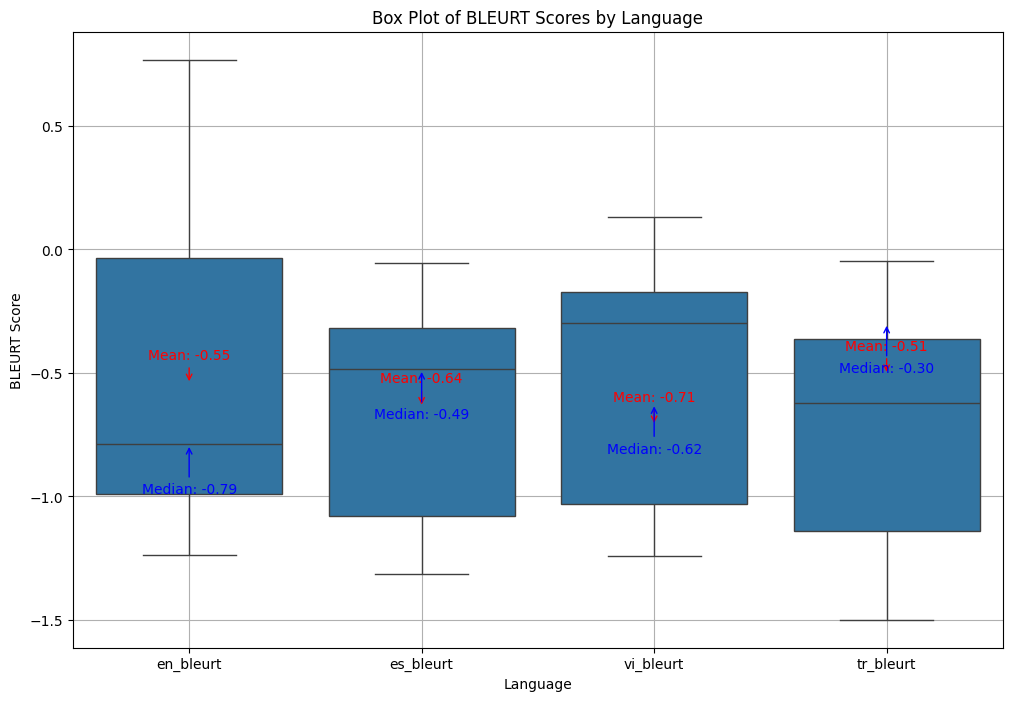

In [47]:
bleurt_df = df[['en_bleurt', 'es_bleurt', 'vi_bleurt', 'tr_bleurt']]

df_long = pd.melt(bleurt_df, var_name='Language', value_name='BLEURT Score')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Language', y='BLEURT Score', data=df_long)

means = df_long.groupby('Language')['BLEURT Score'].mean()
medians = df_long.groupby('Language')['BLEURT Score'].median()

for i, language in enumerate(means.index):
    plt.annotate(f'Mean: {means[language]:.2f}', 
                 xy=(i, means[language]), 
                 xytext=(i, means[language] + 0.1),  # Offset for better visibility
                 arrowprops=dict(arrowstyle='->', color='red'), 
                 color='red', fontsize=10, ha='center')
    
    plt.annotate(f'Median: {medians[language]:.2f}', 
                 xy=(i, medians[language]), 
                 xytext=(i, medians[language] - 0.2),  # Offset for better visibility
                 arrowprops=dict(arrowstyle='->', color='blue'), 
                 color='blue', fontsize=10, ha='center')

plt.title('Box Plot of BLEURT Scores by Language')
plt.xlabel('Language')
plt.ylabel('BLEURT Score')
plt.grid(True)
plt.show()

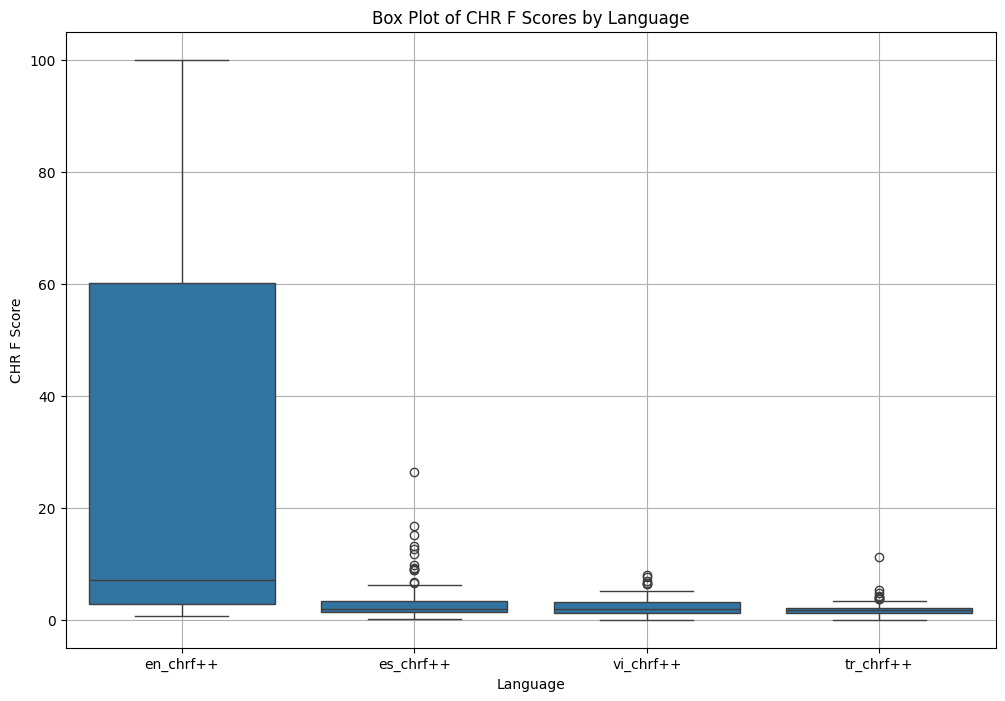

/Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alishasrivastava/BEAM/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alishasrivastava/

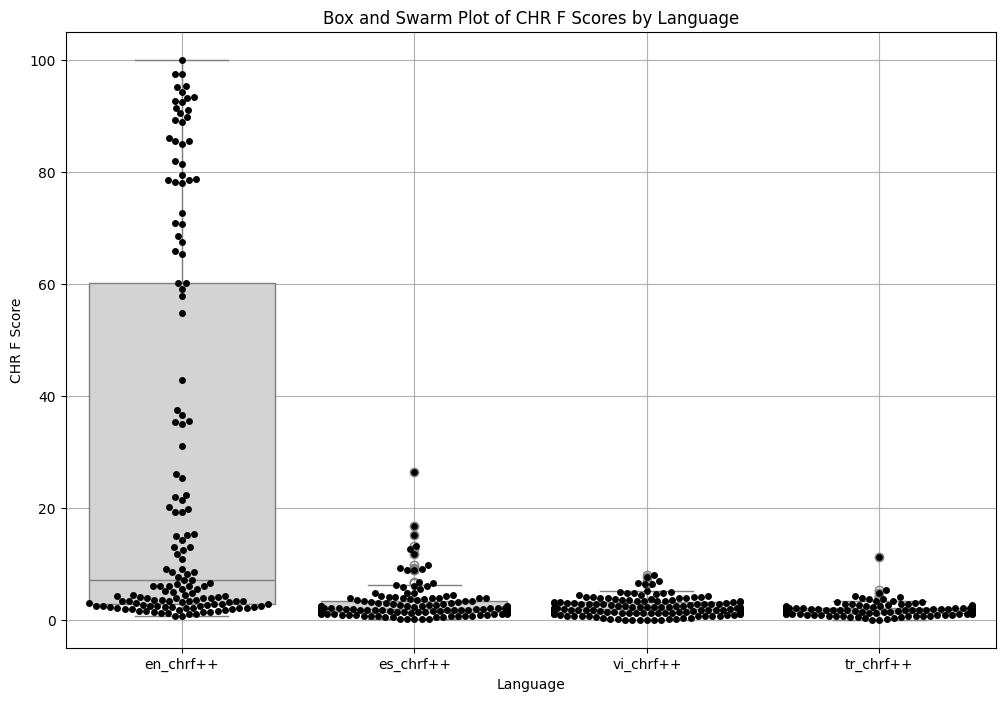

In [46]:
chrf_df = df[['en_chrf++', 'es_chrf++', 'vi_chrf++', 'tr_chrf++']]

df_long_chrf = pd.melt(chrf_df, var_name='Language', value_name='CHR F Score')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Language', y='CHR F Score', data=df_long_chrf)
plt.title('Box Plot of CHR F Scores by Language')
plt.xlabel('Language')
plt.ylabel('CHR F Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

sns.boxplot(x='Language', y='CHR F Score', data=df_long_chrf, color='lightgray')

sns.swarmplot(x='Language', y='CHR F Score', data=df_long_chrf, color='black')

plt.title('Box and Swarm Plot of CHR F Scores by Language')
plt.xlabel('Language')
plt.ylabel('CHR F Score')
plt.grid(True)
plt.show()

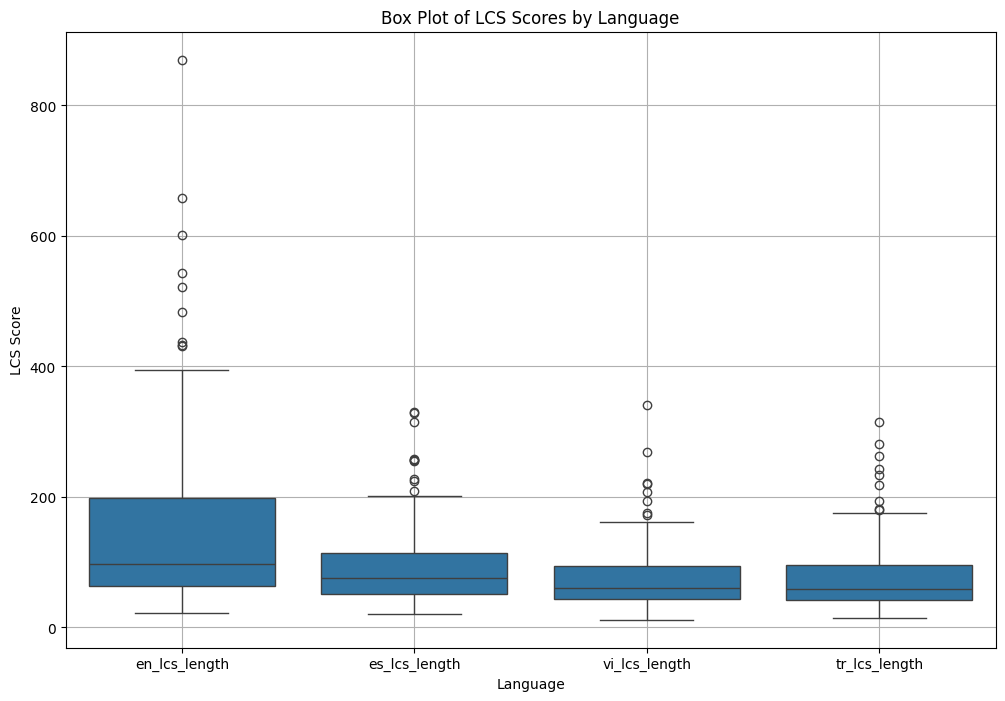